# ABSOLUTE TRICK AND SQUARE TRICK METHOD

In [2]:
a = 0.1
w1 = -0.6
w2 = 4
p = -5
q = 3
print(f'y = {w1 - p * a }x + {w2 - a }')

y = -0.09999999999999998x + 3.9


#SQUARE TRICK

In [3]:
a = 0.01
w1 = -0.6
w2 = 4
p = -5
q = 3
q_ = w1 * p + w2
print(q_)
print(q - q_)
print(f'y = {w1 + p * a * (q - q_)}x + {w2 + a * (q - q_)}')

7.0
-4.0
y = -0.39999999999999997x + 3.96


#

# MEAN ABSOLUTE ERROR AND MEAN SQUARED ERROR

Compute the mean absolute error for the following line and points:

line: y = 1.2x + 2

points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)

In [4]:
points=[(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]
sum=0
for point in points:
    # EQUATION (y = 1.2x + 2)
    y=(1.2 * point[0])+ 2

    # SUMMATION OF DIFFERENCE
    diff=abs(y-point[1])
    sum = sum + diff
print(sum/len(points))





3.88


Compute the mean squared error for the following line and points:

line: y = 1.2x + 2

points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)

In [1]:
from numpy import square
points=[(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]
sum = 0
for point in points:
   # EQUATION (y = 1.2x + 2)
   y = (1.2 * point[0])+ 2

   # SUMMATION OF DIFFERENCE SQUARE
   diff = (abs(y-point[1]))**2
   sum = sum + diff
print( sum / (2 * len(points)))

10.692000000000002


#


#

# Programming Quiz for "Mini-Batch Gradient Descent"

Mini-Batch Gradient Descent Quiz
In this quiz, you'll be given the following sample dataset (as in data.csv), and your goal is to write a function that executes mini-batch gradient descent to find a best-fitting regression line. You might consider looking into numpy's matmul function for this!

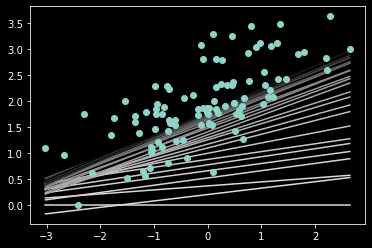

In [2]:
import numpy.matlib 
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)


# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X = np.array([[1, 2], [3, 4]])
    y = np.array([[5, 6], [7, 8]])
    W = predictor feature coefficients
    b = regression function intercept
    learn_rate = 0.005

    Returns
    W_new = predictor feature coefficients following gradient descent step
    b_new = intercept following gradient descent step
    """
    
    # Fill in code
    y_hat = np.matmul(X, W) + b
    errors = y - y_hat
    
    W_new = W + learn_rate * np.matmul(errors, X)
    b_new = b + learn_rate * errors.sum()
        
    return W_new, b_new



# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X = array of predictor features
    y = array of outcome values
    batch_size = 20
    learn_rate = 0.005
    num_iter = number of batches used

    Returns
    regression_coef = array of slopes and intercepts generated by gradient

    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('data.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()

# LINEAR REGRESSION

Linear Regression Quiz
In this quiz, you'll be working with data on the average life expectancy at birth and the average BMI for males across the world. The data comes from Gapminder.

The data file can be found under the "bmi_and_life_expectancy.csv" tab in the quiz below. It includes three columns, containing the following data:

Country – The country the person was born in.

Life expectancy – The average life expectancy at birth for a person in that country.

BMI – The mean BMI of males in that country.

You'll need to complete each of the following steps:
1. Load the data

The data is in the file called "bmi_and_life_expectancy.csv".
Use pandas read_csv to load the data into a dataframe (don't forget to import pandas!)
Assign the dataframe to the variable bmi_life_data.

2. Build a linear regression model

Create a regression model using scikit-learn's LinearRegression and assign it to bmi_life_model.
Fit the model to the data.

3. Predict using the model

Predict using a BMI of 21.07931 and assign it to the variable 'laos_life_exp'

In [5]:
import pandas as pd

bmi_life_data = pd.read_csv('bmi_and_life_expectancy.csv')



# BUILD A LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']]) 



laos_life_exp = bmi_life_model.predict([[21.07931]])
print(laos_life_exp)


[[60.31564716]]


C:\Users\trust\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#

#

Programming Quiz: Multiple Linear Regression
In this quiz, you'll be using the Boston house-prices dataset. The dataset consists of 13 features of 506 houses and the median home value in $1000's. You'll fit a model on the 13 features to predict the value of the houses.

You'll need to complete each of the following steps:

1. Build a linear regression model
Create a regression model using scikit-learn's LinearRegression and assign it to model.
Fit the model to the data.
2. Predict using the model

Predict the value of sample_house.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and assign it to the model variable
model = LinearRegression()
lr = model.fit(x,y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)
print(prediction)

[23.68284712]


C:\Users\trust\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

#

#

# Programming Quiz for "Polynomial Regression"

Polynomial Regression Exercise
Get some practice implementing polynomial regression in this exercise. In data.csv, you can see data generated for one predictor feature ('Var_X') and one outcome feature ('Var_Y'), following a non-linear trend. Use sklearn's PolynomialFeatures class to extend the predictor feature column into multiple columns with polynomial features. Play around with different degrees of polynomial and the Test Run button to see what fits best: when you think you have the best-fitting degree, press the Submit button to check your work!

Perform the following steps below:
1. Load in the data

The data is in the file called 'data.csv'. Note that this data has a header line.
Make sure that you've split out the data into the predictor feature in X and outcome feature in y.
For X, make sure it is in a 2-d array of 20 rows by 1 column. You might need to use NumPy's reshape function to accomplish this.

2. Create polynomial features

Create an instance of sklearn's PolynomialFeatures class and assign it to the variable poly_feat. Pay attention to how to set the degree of features, since that will be how the exercise is evaluated.
Create the polynomial features by using the PolynomialFeatures object's .fit_transform() method. The "fit" side of the method considers how many features are needed in the output, and the "transform" side applies those considerations to the data provided to the method as an argument. Assign the new feature matrix to the X_poly variable.

3. Build a polynomial regression model

Create a polynomial regression model by combining sklearn's LinearRegression class with the polynomial features. Assign the fit model to poly_model.

In [7]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



# Assign the data to predictor and outcome variables
# TODO: Load the data columns
train_data = pd.read_csv('data2.csv')
X = train_data.Var_X.values.reshape(-1, 1)
y = train_data.Var_Y

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

# Once you've completed all of the steps, select Test Run to see your model
# predictions against the data, or select Submit Answer to check if the degree
# of the polynomial features is the same as ours!

#

#

#

# Programming Quiz for "Regularization"

Regularization Exercise
Perhaps it's not too surprising at this point, but there are classes in sklearn that will help you perform regularization with your linear regression.
You'll get practice with implementing that in this exercise. In this assignment's data.csv
you'll find data for a bunch of points including six predictor variables and one outcome variable.
Use sklearn's Lasso class to fit a linear regression model to the data, while also using L1 regularization to control for model complexity.

Perform the following steps:
1. Load in the data

The data is in the file called 'data.csv'. Note that there's no header row on this file.
Split the data so that the six predictor features (first six columns) are stored in X, and the outcome feature (last column) is stored in y.

2. Fit data using linear regression with Lasso regularization

Create an instance of sklearn's Lasso class and assign it to the variable lasso_reg. You don't need to set any parameter values: use the default values for the quiz.
Use the Lasso object's .fit() method to fit the regression model onto the data.

3. Inspect the coefficients of the regression model

Obtain the coefficients of the fit regression model using the .coef_ attribute of the Lasso object. Store this in the reg_coef variable: the coefficients will be printed out, 
and you will use your observations to answer the question at the bottom of the page.

In [8]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import Lasso

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data3.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]


#


#

# Feature Scaling
What is feature scaling? Feature scaling is a way of transforming your data into a common range of values. There are two common scalings:

Standardizing
Normalizing
Standardizing

1. Standardizing is completed by taking each value of your column, subtracting the mean of the column, and then dividing by the standard deviation of the column. In Python, let's say you have a column in df called height. You could create a standardized height as:

df["height_standard"] = (df["height"] - df["height"].mean()) / df["height"].std()
This will create a new "standardized" column where each value is a comparison to the mean of the column, and a new, standardized value can be interpreted as the number of standard deviations the original height was from the mean. This type of feature scaling is by far the most common of all techniques (for the reasons discussed here, but also likely because of precedent).


2. Normalizing
A second type of feature scaling that is very popular is known as normalizing. With normalizing, data are scaled between 0 and 1. Using the same example as above, we could perform normalizing in Python in the following way:

df["height_normal"] = (df["height"] - df["height"].min()) /     \
                      (df["height"].max() - df['height'].min())
When Should I Use Feature Scaling?
In many machine learning algorithms, the result will change depending on the units of your data. This is especially true in two specific cases:

When your algorithm uses a distance-based metric to predict.
When you incorporate regularization.
Distance Based Metrics
In future lessons, you will see one common supervised learning technique that is based on the distance points are from one another called Support Vector Machines (or SVMs). Another technique that involves distance based methods to determine a prediction is k-nearest neighbors (or k-nn). With either of these techniques, choosing not to scale your data may lead to drastically different (and likely misleading) ending predictions.

For this reason, choosing some sort of feature scaling is necessary with these distance based techniques.


3. Regularization
When you start introducing regularization, you will again want to scale the features of your model. The penalty on particular coefficients in regularized linear regression techniques depends largely on the scale associated with the features. When one feature is on a small range, say from 0 to 10, and another is on a large range, say from 0 to 1 000 000, applying regularization is going to unfairly punish the feature with the small range. Features with small ranges need to have larger coefficients compared to features with large ranges in order to have the same effect on the outcome of the data. (Think about how ab = baab=ba for two numbers aa and bb.) Therefore, if regularization could remove one of those two features with the same net increase in error, it would rather remove the small-ranged feature with the large coefficient, since that would reduce the regularization term the most.

Again, this means you will want to scale features any time you are applying regularization.

A useful Quora post on the importance of feature scaling when using regularization.
A point raised in the article above is that feature scaling can speed up convergence of your machine learning algorithms, which is an important consideration when you scale machine learning applications.

Use the quiz below to get some practice with feature scaling.

Feature Scaling Exercise
Previously, you saw how regularization will remove features from a model (by setting their coefficients to zero) if the penalty for removing them is small. In this exercise, you'll revisit the same dataset as before and see how scaling the features changes which features are favored in a regularization step. See the "Quiz: Regularization" page for more details. The only thing different for this quiz compared to the previous one is the addition of a new step after loading the data, where you will use sklearn's StandardScaler to standardize the data before you fit a linear regression model to the data with L1 (Lasso) regularization.

Perform the following steps:
1. Load in the data

The data is in the file called 'data.csv'. Note that there's no header row on this file.
Split the data so that the six predictor features (first six columns) are stored in X, and the outcome feature (last column) is stored in y.

2. (NEW) Perform feature scaling on data via standardization

Create an instance of sklearn's StandardScaler and assign it to the variable scaler.
Compute the scaling parameters by using the .fit_transform() method on the predictor feature array, which also returns the predictor variables in their standardized values. Store those standardized values in X_scaled.

3. Fit data using linear regression with Lasso regularization

Create an instance of sklearn's Lasso class and assign it to the variable lasso_reg. You don't need to set any parameter values: use the default values for the quiz.
Use the Lasso object's .fit() method to fit the regression model onto the data. Make sure that you apply the fit to the standardized data from the previous step (X_scaled), not the original data.

4. Inspect the coefficients of the regression model

Obtain the coefficients of the fit regression model using the .coef_ attribute of the Lasso object. Store this in the reg_coef variable: the coefficients will be printed out, and you will use your observations to answer the question at the bottom of the page.

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data4.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]


# TODO: Create the standardization scaling object.
scaler = StandardScaler()

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X_scaled, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[  0.           3.88759409   8.89515683  -0.         -11.59169369
   0.46240823]
